# *Well Test Analysis of Gas Well*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Q.)  A pressure-buildup test was run on a gas well in a newly discovered reservoir. Known and calculated data is summarized in the following tabel. Determine effective Permeability(k) to gas and Skin Factor(S).

  $h = 28 ft$

 $   r_w = 0.3 ft $
 
  $  phi = 0.18 $
  
   $ t_p = 2000 hrs. $
   
   $(S.G.)_gas = 0.7 $
    
   $T = 640 R (180 degree F) $
    
   $u_g = 0.01885 cp at avg. reservoir pressure. $
    
   $q_g = 5256 Mscf/D $
    
   $B_g = 0.962 bbl/Mscf $
    
   $P_i = 2906 psia $
    
   $pai = 1718.59 psi $
    
   $Z = 0.8678 $
    
   $c_t = 2.238 * 10^-4 psia^-1 $

In [3]:
Press = pd.read_excel(r'C:\Users\sahil\OneDrive\Desktop\EDVANTAGE\DATA\Well Test/well_test.xlsx')

In [4]:
Press.head()

,"Shut in Time, hrs","Shut in Pressure, Psia"
0,0.01,2038
1,0.02,2108
2,0.03,2135
3,0.04,2148
4,0.05,2156


In [5]:
PVT = pd.read_excel(r'C:\Users\sahil\OneDrive\Desktop\EDVANTAGE\DATA\Well Test/well_test.xlsx','PVT')

In [6]:
PVT

,P (psia),ug (cp),Z
0,0,0.013,1.000
1,400,0.013,0.937
2,800,0.014,0.882
3,1200,0.015,0.832
4,1600,0.017,0.794
5,2000,0.018,0.770
6,2400,0.020,0.763
7,2800,0.022,0.775
8,3200,0.023,0.797
9,3600,0.025,0.827


In [7]:
PVT['2P/uz'] = 2*PVT['P (psia)']/(PVT['ug (cp)']*PVT['Z'])

In [8]:
PVT

,P (psia),ug (cp),Z,2P/uz
0,0,0.013,1.000,0.000000
1,400,0.013,0.937,65676.052869
2,800,0.014,0.882,129575.639780
3,1200,0.015,0.832,192307.692308
4,1600,0.017,0.794,237072.158838
5,2000,0.018,0.770,288600.288600
6,2400,0.020,0.763,314547.837484
7,2800,0.022,0.775,328445.747801
8,3200,0.023,0.797,349135.344498
9,3600,0.025,0.827,348246.674728


In [9]:
PVT['Avrage']=np.nan

In [10]:
PVT['Avrage'][0]=0

In [11]:
for i in PVT.index:
    if i>0:
        PVT['Avrage'][i] = (PVT['2P/uz'][i]+PVT['2P/uz'][i-1])/2

In [12]:
PVT['2P/ugZ*dP'] = PVT['Avrage']*(PVT['P (psia)'][1]-PVT['P (psia)'][0])

In [13]:
PVT.head()

,P (psia),ug (cp),Z,2P/uz,Avrage,2P/ugZ*dP
0,0,0.013,1.000,0.000000,0.000000,0.000000e+00
1,400,0.013,0.937,65676.052869,32838.026435,1.313521e+07
2,800,0.014,0.882,129575.639780,97625.846324,3.905034e+07
3,1200,0.015,0.832,192307.692308,160941.666044,6.437667e+07
4,1600,0.017,0.794,237072.158838,214689.925573,8.587597e+07


In [14]:
PVT['m(P)']=np.nan
PVT['m(P)'][0] = 0

In [15]:
for i in PVT.index:
    if i>0:
        PVT['m(P)'][i] = PVT['2P/ugZ*dP'][i]+PVT['m(P)'][i-1]

In [16]:
PVT.head()

,P (psia),ug (cp),Z,2P/uz,Avrage,2P/ugZ*dP,m(P)
0,0,0.013,1.000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,400,0.013,0.937,65676.052869,32838.026435,1.313521e+07,1.313521e+07
2,800,0.014,0.882,129575.639780,97625.846324,3.905034e+07,5.218555e+07
3,1200,0.015,0.832,192307.692308,160941.666044,6.437667e+07,1.165622e+08
4,1600,0.017,0.794,237072.158838,214689.925573,8.587597e+07,2.024382e+08


In [17]:
Press.head()

,"Shut in Time, hrs","Shut in Pressure, Psia"
0,0.01,2038
1,0.02,2108
2,0.03,2135
3,0.04,2148
4,0.05,2156


### Horner Time = $(tp + detla(t))/delta(t)$

In [18]:
Press['Horner time'] = np.zeros(31)
tp = 2000   # hours

In [19]:
for i in Press.index:
    Press['Horner time'][i] = (tp + Press['Shut in Time, hrs'][i])/Press['Shut in Time, hrs'][i]

In [20]:
Press.head()

,"Shut in Time, hrs","Shut in Pressure, Psia",Horner time
0,0.01,2038,200001.000000
1,0.02,2108,100001.000000
2,0.03,2135,66667.666667
3,0.04,2148,50001.000000
4,0.05,2156,40001.000000


### Now We have to find out Psuedo Pressure for given Pressure from m(P) vs. Pressure Plot.

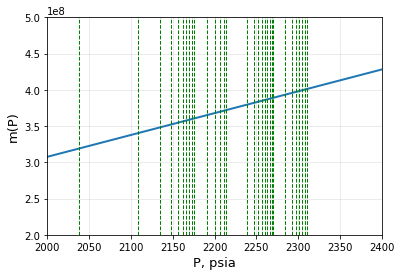

In [21]:
plt.plot(PVT['P (psia)'],PVT['m(P)'],lw=2)
plt.xlim(2000,2400)
plt.ylim(200000000,500000000)
plt.xlabel('P, psia',size=13)
plt.ylabel('m(P)',size=13)
plt.grid(alpha=0.3)
for i in Press.index:
    plt.axvline(Press['Shut in Pressure, Psia'][i],lw=1,c='g',ls='--')

In [22]:
def linear(x, a, c):
    return a*x+c

In [23]:
param = curve_fit(linear,PVT['P (psia)'][3:],PVT['m(P)'][3:])

In [24]:
m,c = param[0][0],param[0][1]

In [25]:
m*PVT['P (psia)']+c

0    -3.057348e+08
1    -1.792735e+08
2    -5.281230e+07
3     7.364893e+07
4     2.001102e+08
5     3.265714e+08
6     4.530326e+08
7     5.794938e+08
8     7.059551e+08
9     8.324163e+08
10    9.588775e+08
11    1.085339e+09
Name: P (psia), dtype: float64

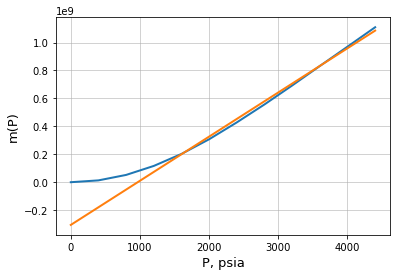

In [26]:
plt.plot(PVT['P (psia)'],PVT['m(P)'],lw=2)
plt.plot(PVT['P (psia)'],m*PVT['P (psia)']+c,lw=2)
plt.xlabel('P, psia',size=13)
plt.ylabel('m(P)',size=13)
plt.grid(alpha=0.7)

In [27]:
Press['m(P)'] = m*Press['Shut in Pressure, Psia']+c

In [28]:
Press.head()

,"Shut in Time, hrs","Shut in Pressure, Psia",Horner time,m(P)
0,0.01,2038,200001.000000,3.385852e+08
1,0.02,2108,100001.000000,3.607159e+08
2,0.03,2135,66667.666667,3.692521e+08
3,0.04,2148,50001.000000,3.733620e+08
4,0.05,2156,40001.000000,3.758913e+08


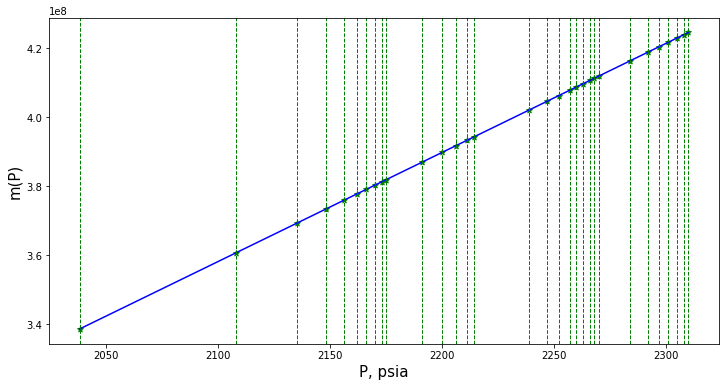

In [29]:
plt.figure(figsize=(12,6))
plt.plot(Press['Shut in Pressure, Psia'],Press['m(P)'],'b')
plt.scatter(Press['Shut in Pressure, Psia'],Press['m(P)'],c='g',marker='*')
plt.xlabel('P, psia',size=15)
plt.ylabel('m(P)',size=15)
for i in Press.index:
    plt.axvline(Press['Shut in Pressure, Psia'][i],lw=1,c='g',ls='--')

In [30]:
h = 28 # ft

r_w = 0.3 # ft
 
phi = 0.18
  
t_p = 2000 #hrs.
   
SG_gas = 0.7 
    
T = 640 #R (180 degree F) 
    
u_g = 0.01885 #cp at avg. reservoir pressure. 
    
q_g = 5256 #Mscf/D 
    
B_g = 0.962 #bbl/Mscf 
    
P_i = 2906 #psia 
    
pai = 1718.59 #psi 
    
Z = 0.8678 
    
c_t = 2.238*(10**(-4)) #psia^-1

In [31]:
Press['Horner time log'] = np.log(Press['Horner time'])

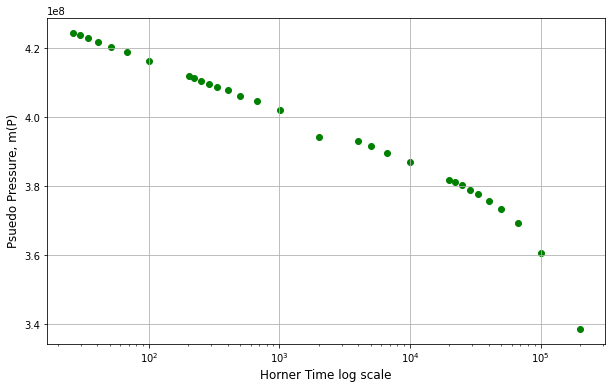

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(Press['Horner time'],Press['m(P)'],color='g')
plt.semilogx()
plt.xlabel('Horner Time log scale',size=12)
plt.ylabel('Psuedo Pressure, m(P)',size=12)
plt.grid()

In [33]:
parameter = curve_fit(linear,Press['Horner time log'][4:],Press['m(P)'][4:])

In [34]:
m1,c1 = parameter[0][0],parameter[0][1]

In [35]:
linefit = m1*Press['Horner time log']+c1

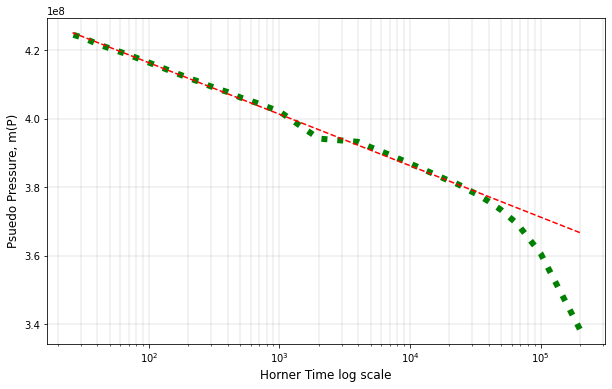

In [36]:
plt.figure(figsize=(10,6))
plt.semilogx(Press['Horner time'],Press['m(P)'],color='g',ls='dotted',lw=6)
plt.semilogx(Press['Horner time'],linefit,ls='--',c='r')
plt.xlabel('Horner Time log scale',size=12)
plt.ylabel('Psuedo Pressure, m(P)',size=12)
plt.grid(True, which='both', color='black', linewidth=0.1)

### Slope we find from this graph is


In [37]:
m = parameter[0][0]
m

-6523506.084589064

### Permeability (k):

*We can calculate Permeability using slope m.*

### $ m = 1637Q_gB_gT/kh $

In [38]:
B_g = 0.962 #bbl/Mscf

In [39]:
Bg = B_g*5.6/1000  # ft^3/SCf

In [40]:
Bg

0.005387199999999999

In [41]:
m_cycle=m*np.log(10)
m_cycle

-15020927.864430735

In [42]:
k = 1637*q_g*1000*Bg*T/(abs(m_cycle)*h)

In [43]:
k

70.53299365752275

In [44]:
print('Permeability =',k,'mD')

Permeability = 70.53299365752275 mD


### Skin Factor (S'):

$ S' = 1.151[{(m(P_1hr)-m(P_wf))/|m|} - log(k/phi u_i C_t r_w^2) + 3.23] $

In [45]:
t1 = 1 #hr

t_horner = (tp + t1 )/t1

t_horner

2001.0

In [46]:
m_P_1hr = m1*np.log(t_horner) + c1

In [47]:
m_P_1hr

396817286.45897883

In [48]:
S = 1.151*(((m_P_1hr-Press['m(P)'][0])/abs(m_cycle)) - np.log(k/(phi*u_g*c_t*r_w**2)) + 3.23)

In [49]:
S

-15.708957066537048

In [50]:
print('Combine Skin Factor for Gas Well is =',S)

Combine Skin Factor for Gas Well is = -15.708957066537048


**Results of this Well-Test:**

**Permeability = 70.53299365752275 mD**

**Combine Skin Factor for Gas Well is = -15.708957066537048**